# Forward Process

In [1]:
import sys
sys.path.append('../')

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from utils import create_img

## Beta Schedule Formula

$$ \beta_{t} = \beta_{start} + (\beta_{end} - \beta_{start}) \frac{t}{T}\ $$

Where: 
- $\beta_{start} $ is the initial noise level
- $\beta_{end} $ is the final noise level
- $T$ is the total of timesteps

In [2]:
def beta_schedule(b_start = 0.0001, b_end = 0.02, T = 1000):
    return np.linspace(b_start, b_end, T)

## Diffusion Process

The forward diffusion process is defined as:

$$ x_{t} = \sqrt{\alpha_{t}} x_{t-1} + \sqrt{1 - \alpha_{t}} \epsilon_{t}$$

Where:

- $x_{t}$ is the image at timestep t
- $ \alpha_{t} = 1 - \beta_{t}$
- $ \beta_{t} $ is the noise schedule at timestep t
- $\epsilon_t \sim \mathcal{N}(0, I)$ is Gaussian Noise


In [3]:
def forward_diffusion(x0, beta_sch, T_steps):
    x_t = x0.astype(np.float32) / 255.0
    steps = []

    for t in range(T_steps):
        beta_t = beta_sch[t]
        alpha_t = 1 - beta_t
        epsilon = np.random.normal(size = x_t.shape) #noise
        x_t = np.sqrt(alpha_t) * x_t + np.sqrt(1-alpha_t) * epsilon

        steps.append(np.copy(x_t))

    x_t = np.clip(x_t * 255.0, 0, 255).astype(np.uint8)
    return x_t, steps

In [4]:
x0 = create_img()

In [5]:
T = 20
beta_sch = beta_schedule(T=T)
noisy_img, steps = forward_diffusion(x0, beta_sch, T_steps=T)

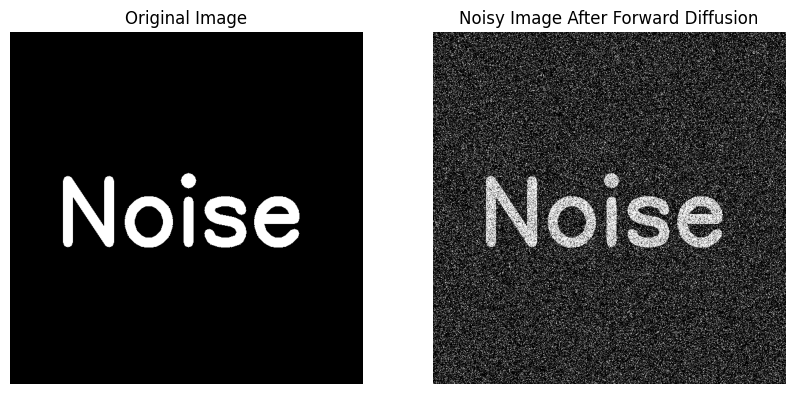

In [6]:
size = (10, 8)
plt.figure(figsize = (size))
plt.subplot(1, 2, 1)
plt.imshow(x0, cmap = plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img, cmap = plt.cm.gray)
plt.title("Noisy Image After Forward Diffusion")
plt.axis('off')

plt.show()

In [7]:
def show_diffusion_steps(steps, cols = 4, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    
    num_steps = len(steps) 
    rows = (num_steps + cols - 1) // cols
    
    for i, step in enumerate(steps):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(np.clip(step * 255, 0, 255).astype(np.uint8), cmap=plt.cm.gray)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

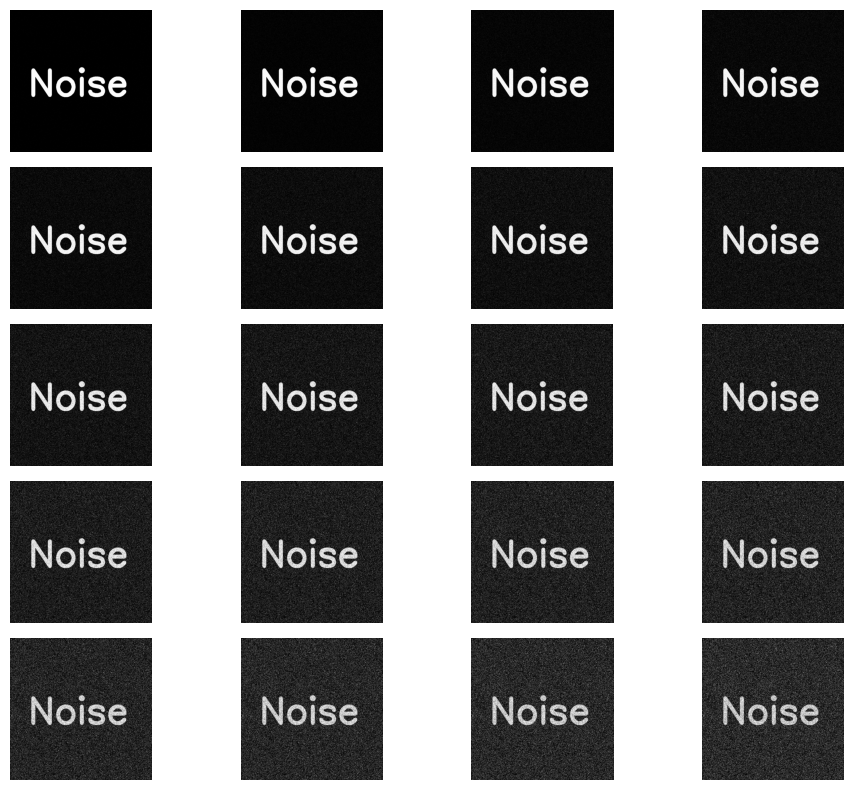

In [8]:
show_diffusion_steps(steps)